<a href="https://colab.research.google.com/github/lauranimo/insurancefraud/blob/main/CS363M_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

**Problem and Dataset Description**
> Problem: The total cost of insurance fraud is more than $40 billion per year (FBI). Consequently, it is imperative for insurance companies to develop methods to discern legitimate claims from fraudulent claims. Processing these claims by hand is wholly unsustainable. Insurance companies receive millions of claims a year, and to individually inspect each claim is unfeasible. Consequently, it becomes necessary to create a machine learning model to classify claims into legitimate and fraudulent categories. The model would be scalable, efficient, and introduce less bias into determining what claims are fraudulent.

> Dataset Description: The dataset used to train the model is a collection of claims, demographic, vehicle, and policy information related to auto insurance claims. The data includes whether the customer claim was fraudulent, as well as an overview of the claimed collision. Information such as the number of cars involved, the type of collision, and the amount of damage are all documented, as well as information related to the demgoraphics of the claimant and the features of the involved vehicle. The dataset has 46 total features, among which are the date of the incident, the type of collision, the geographical location of the collision, the number of witnesses, and the amount of damages the claimant filed. The dataset also contains descriptions of the vehicle involved, the policy of the claimant, and several demographic data points related to the claimant themselves. To limit complexity, however, we chose to focus on only the data contained in the claim, which as 20 features including the fraudulent status.



**Reading Data from CSVs**

In [ ]:
data = pd.read_csv('/content/Train_Claim.csv', na_values=['?',-5,'MISSINGVALUE', 'MISSEDDATA'])
labels = pd.read_csv('/content/Traindata_with_Target.csv', na_values=['?',-5,'MISSINGVALUE', 'MISSEDDATA'])
all_data = pd.merge(data, labels, on=['CustomerID'], how='inner')
print(all_data.shape)
all_data.head(10)

(28836, 20)


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481,N
5,Cust10005,2015-02-07,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State7,City6,Location 1695,7.0,1,NO,1,2.0,NaN,53167.0,7818,8132,37217,N
6,Cust10006,2015-01-30,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City4,Location 1440,20.0,1,NaN,0,2.0,NO,77453.0,6476,12822,58155,N
7,Cust10007,2015-01-12,Single Vehicle Collision,Front Collision,Minor Damage,Police,State5,City3,Location 1440,18.0,1,NaN,0,2.0,NO,60569.0,5738,7333,47498,N
8,Cust10009,2015-02-06,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State9,City2,Location 1521,3.0,3,YES,0,0.0,NaN,67876.0,6788,7504,53584,N
9,Cust1001,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5.0,1,YES,1,2.0,YES,71610.0,6510,13020,52080,Y


**Exploring Data**

We began exploring by determing the datatypes of each attribute, the length of the dataset, and the number of fraudulent vs. non-fraudulent records in the dataset.

CustomerID                object
DateOfIncident            object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident        object
AuthoritiesContacted      object
IncidentState             object
IncidentCity              object
IncidentAddress           object
IncidentTime             float64
NumberOfVehicles           int64
PropertyDamage            object
BodilyInjuries             int64
Witnesses                float64
PoliceReport              object
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
ReportedFraud             object
dtype: object
TOTAL LENGTH:: 28836
21051 7785
PERCENT FRAUDULENT:: 26.997503121098624


<BarContainer object of 2 artists>

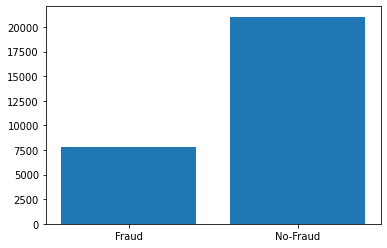

In [ ]:
# Column data types
print(all_data.dtypes)
# DateOfIncident => should make an actual date
# TypeOfIncident => one-hot encode
# TypeOfCollission => one-hot encode
# SeverityOfIncident => one-hot encode
# AuthoritiesContacted => one-hot encode
# Drop City and Address maybe
# PropertyDamage filling in missing values and change to a boolean, might want to drop
# PoliceReport filling in missing values and change to a boolean
# ReportedFraud is labels, change to a boolean
 # Plotting how many of each label we have
no, yes = all_data['ReportedFraud'].value_counts()
print('TOTAL LENGTH:: ' + str(no + yes))
print(no, yes)
# percent of total that are fraudulent
print('PERCENT FRAUDULENT:: ' + str(yes/(yes + no) * 100))
data = {
    'Fraud': yes,
    'No-Fraud': no
}

plt.bar(list(data.keys()), list(data.values()))

Any data type that is not a primitive (i.e. float, int, or bool) should be made into one to make training the model easier.

The first piece of data we decided to explore was the location of the claimed collison. We noticed, however, that all claims were sourced from the same seven states. Moreover, the dataset did not have a description of what states the encodings referred to. We want the model to generalize to all fifty states, and if we train the model on location data that only corresponds to seven states, we may pick up incorrect trends. For this reason, we decided to drop all location data from our dataset.

In [ ]:
# Investigate locations
print(all_data['IncidentState'].value_counts())

State5    7886
State7    7168
State9    6161
State8    3181
State4    3029
State6     810
State3     601
Name: IncidentState, dtype: int64


In [ ]:
all_data = all_data.drop(['IncidentCity', 'IncidentAddress', 'IncidentState'], axis=1)

Before graphing any data points or determining which attributes to examine, we realized we had to deal with missing values in the dataset.

In [ ]:
all_data.isna().sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
ReportedFraud                0
dtype: int64

For the missing values in the Witnesses, IncidentTime, and AmountOfTotalClaim attributes, we noted that the number of these values were very small relative to the total size of the dataset. Consequently, we wondered if we could drop the rows missing these values. To better understand if we could do this, we first examined each of the missing attributes to determine how many of the records that were missing each attribute were fraudulent. If a high percentage were fraudulent, this would have indicated that these records were important to the process, as there are much fewer fraudulent records in our dataset. Luckily, we found that, within all three missing attributes, the fraction of records that were fraudulent was low enough that we could delete records with these missing attributes.

In [ ]:
# Number of missing IncidentTimes that are fraud
na_data = all_data.loc[all_data['IncidentTime'].isna()]
len(na_data.loc[na_data['ReportedFraud'] == 'Y'])

8

In [ ]:
# Dealing with AmountOfTotalClaim missing values
na_data = all_data.loc[all_data['AmountOfTotalClaim'].isna()]
len(na_data.loc[na_data['ReportedFraud'] == 'Y'])
# only 50 total missing values, and only 16 of these are Yes, probably safe to drop the rows
all_data.dropna(subset=['AmountOfTotalClaim'], inplace=True)

In [ ]:
# Dealing with Witnesses missing values
na_data = all_data.loc[all_data['Witnesses'].isna()]
len(na_data.loc[na_data['ReportedFraud'] == 'Y'])
# only 50 total missing values, and only 13 of these are Yes, probably safe to drop the rows
all_data.dropna(subset=['Witnesses'], inplace=True)

We found that dropping the records that were missing the AmountOfTotalClaim and Witness attributes also took care of our missing IncidentTime values.

In [ ]:
# Dropping missing values for AmountOfTotalClaim and Witnesses also dropped missing IncidentTimeValues
all_data.isna().sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5143
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentTime                 0
NumberOfVehicles             0
PropertyDamage           10423
BodilyInjuries               0
Witnesses                    0
PoliceReport              9777
AmountOfTotalClaim           0
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
ReportedFraud                0
dtype: int64

We then decided to explore the PropertyDamage attribute. We discovered that the attribute was a little odd, in that the value could be NO, but the AmountOfPropertyClaim on the same record could still be greater than zero. We also found that almost half of the attribute values were missing. We decided that even if we imputed these missing values from similar cases, the imputed values would likely not be accurate due to the large amount of missing values. As such, we decided to drop the attribute from all records.

In [ ]:
# PropertyDamage is oddly inconsistent; you can have NO for the value and still have a positive AmountOfPropertyClaim
# PropertyDamage is missing almost half of the values; even if impute from similar cases, probably not going to be the most accurate value -> drop the column
na_data = all_data.loc[all_data['PropertyDamage'] == 'NO']
print(na_data.loc[na_data['AmountOfPropertyClaim'] > 0])
all_data = all_data.drop(['PropertyDamage'], axis=1)

      CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
4      Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   
5      Cust10005     2015-02-07  Single Vehicle Collision   Rear Collision   
10     Cust10011     2015-02-10  Single Vehicle Collision   Rear Collision   
13     Cust10014     2015-01-02   Multi-vehicle Collision   Rear Collision   
14     Cust10016     2015-02-28   Multi-vehicle Collision   Side Collision   
...          ...            ...                       ...              ...   
28823   Cust9981     2015-01-11  Single Vehicle Collision   Side Collision   
28824   Cust9982     2015-02-07   Multi-vehicle Collision   Side Collision   
28830   Cust9992     2015-01-11             Vehicle Theft              NaN   
28831   Cust9993     2015-01-24             Vehicle Theft              NaN   
28835   Cust9999     2015-01-13  Single Vehicle Collision  Front Collision   

      SeverityOfIncident AuthoritiesContacted  IncidentTime  Nu

In [ ]:
all_data.head(10)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,17.0,3,1,0.0,NaN,65501.0,13417,6071,46013,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,10.0,3,2,1.0,YES,61382.0,15560,5919,39903,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,2,3.0,NO,66755.0,11630,11630,43495,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,2,3.0,NO,66243.0,12003,12003,42237,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10.0,1,2,1.0,YES,53544.0,8829,7234,37481,N
5,Cust10005,2015-02-07,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,7.0,1,1,2.0,NaN,53167.0,7818,8132,37217,N
6,Cust10006,2015-01-30,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,20.0,1,0,2.0,NO,77453.0,6476,12822,58155,N
7,Cust10007,2015-01-12,Single Vehicle Collision,Front Collision,Minor Damage,Police,18.0,1,0,2.0,NO,60569.0,5738,7333,47498,N
8,Cust10009,2015-02-06,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,3.0,3,0,0.0,NaN,67876.0,6788,7504,53584,N
9,Cust1001,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,5.0,1,1,2.0,YES,71610.0,6510,13020,52080,Y


We then examined the dataset and found that AuthoritiesContacted could act as a proxy for PoliceReport. Odds are, if the claimant contacted the police, they would also file a police report. Moreover, while almost half of the PoliceReprot attributes were missing, the AuthoritiesContacted attribute had no missing records. We didn't want to drop the rows that were missing the PoliceReport value because we determined that almost a quarter of these rows corresponded to fraudulent claims. As such, we decided to drop the PoliceReport attribute from all rows.

In [ ]:
all_data['AuthoritiesContacted'].value_counts()

Police       8300
Fire         6494
Ambulance    5720
Other        5545
None         2681
Name: AuthoritiesContacted, dtype: int64

In [ ]:
reported_police = all_data.loc[all_data['PoliceReport'] == 'YES']
print(len(reported_police))
reported_police.loc[reported_police['ReportedFraud'] == 'Y']

9103


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
9,Cust1001,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,5.0,1,1,2.0,YES,71610.0,6510,13020,52080,Y
39,Cust10046,2015-01-06,Single Vehicle Collision,Front Collision,Minor Damage,Police,15.0,1,2,2.0,YES,78737.0,10717,13762,54258,Y
59,Cust10073,2015-02-17,Parked Car,NaN,Trivial Damage,Police,7.0,1,0,1.0,YES,3197.0,581,292,2324,Y
67,Cust10084,2015-02-26,Multi-vehicle Collision,Rear Collision,Major Damage,Police,13.0,3,0,3.0,YES,65046.0,8094,8094,48858,Y
104,Cust10127,2015-02-14,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,15.0,4,1,2.0,YES,55162.0,6927,5174,43061,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,Cust9863,2015-01-19,Single Vehicle Collision,Rear Collision,Major Damage,Fire,18.0,1,0,2.0,YES,43421.0,7611,7611,28199,Y
28805,Cust9959,2015-02-07,Single Vehicle Collision,Side Collision,Total Loss,Fire,17.0,1,0,2.0,YES,72631.0,10910,6172,55549,Y
28807,Cust9962,2015-01-02,Single Vehicle Collision,Front Collision,Total Loss,Police,6.0,1,1,2.0,YES,37128.0,4410,3635,29083,Y
28809,Cust9964,2015-02-23,Single Vehicle Collision,Rear Collision,Total Loss,Police,18.0,1,0,2.0,YES,67344.0,9064,8326,49954,Y


In [ ]:
# PoliceReport doesn't appear too impactful and almost half of the data points are missing a value for it; should drop
all_data = all_data.drop(['PoliceReport'], axis=1)

We then wanted to explore the TypeOfCollision field. We believed this to be an important attribute based on domain knowledge. For any claim, the type of collision reported is under great scrutiny, as it can be a signficant contributed factor to the value of the claim. As such, we wanted to make sure we kept this attribute. Unfortunately, we found that 10% of the values were missing. To solve this issue, we first attempted to derive an imputation algorithm. We found, however, that no combination of the other attributes was well-suited to imputing the value. Consequently, instead of dropping the rows missing the value, we decided to encode missing values with the value 'Missing.' In essence, instead of treating the value as a missing piece of data, we decided that the fact that the value was missing could be used to draw a conclusion about whether the claim was fraudulent. Again, based on domain knowledge, this made some sense. If the type of collision field is left blank on a claim, that says somethinga about the claim itself.

In [ ]:
reported_police = all_data.loc[all_data['TypeOfCollission'].isna()]
print(len(reported_police))
reported_police.loc[reported_police['ReportedFraud'] == 'Y']
# 10% of missing TypeOfCollission values are Yes for ReportedFraud; maybe we shouldn't drop these rows; maybe consider them as 'Missing' instead

5143


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
59,Cust10073,2015-02-17,Parked Car,NaN,Trivial Damage,Police,7.0,1,0,1.0,3197.0,581,292,2324,Y
234,Cust1028,2015-01-07,Vehicle Theft,NaN,Minor Damage,None,5.0,1,2,1.0,5720.0,1040,520,4160,Y
306,Cust10369,2015-02-11,Vehicle Theft,NaN,Minor Damage,None,15.0,1,1,3.0,4541.0,893,524,3124,Y
394,Cust10474,2015-02-20,Vehicle Theft,NaN,Trivial Damage,Police,8.0,1,1,3.0,3658.0,683,372,2603,Y
424,Cust10510,2015-01-24,Parked Car,NaN,Trivial Damage,None,4.0,1,1,2.0,4332.0,8,959,3365,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28447,Cust9489,2015-01-24,Vehicle Theft,NaN,Minor Damage,Police,8.0,1,2,2.0,5533.0,614,624,4295,Y
28562,Cust9636,2015-02-25,Parked Car,NaN,Trivial Damage,Police,6.0,1,0,3.0,5126.0,546,916,3664,Y
28637,Cust9736,2015-02-06,Parked Car,NaN,Minor Damage,None,17.0,1,2,1.0,5660.0,566,1133,3961,Y
28732,Cust9861,2015-01-07,Parked Car,NaN,Minor Damage,None,7.0,1,0,2.0,5911.0,1042,609,4260,Y


In [ ]:
# Create new value for missing TypeOfCollission attributes and consider it filled
all_data['TypeOfCollission'].fillna(value='Missing', inplace=True)

Now, all missing values have been dealt with. Next, we wanted to format the data for graphical analysis and training. To do so, we needed to deal with the categorical attributes.

In [ ]:
all_data.isna().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
Witnesses                0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
ReportedFraud            0
dtype: int64

In [ ]:
all_data.head(10)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,17.0,3,1,0.0,65501.0,13417,6071,46013,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,10.0,3,2,1.0,61382.0,15560,5919,39903,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,2,3.0,66755.0,11630,11630,43495,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,2,3.0,66243.0,12003,12003,42237,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10.0,1,2,1.0,53544.0,8829,7234,37481,N
5,Cust10005,2015-02-07,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,7.0,1,1,2.0,53167.0,7818,8132,37217,N
6,Cust10006,2015-01-30,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,20.0,1,0,2.0,77453.0,6476,12822,58155,N
7,Cust10007,2015-01-12,Single Vehicle Collision,Front Collision,Minor Damage,Police,18.0,1,0,2.0,60569.0,5738,7333,47498,N
8,Cust10009,2015-02-06,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,3.0,3,0,0.0,67876.0,6788,7504,53584,N
9,Cust1001,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,5.0,1,1,2.0,71610.0,6510,13020,52080,Y


We decided the best way to deal with categorical variables with a limited domain was to onehot encode the attributes. TypeOfIncident, TypeOfCollission, AuthoritiesContacted, and SeverityOfIncident all have domains restricted to at most five values, making them ideal for one-hot encoding.

In [ ]:
print(len(all_data['TypeOfIncident'].value_counts()))
print(len(all_data['TypeOfCollission'].value_counts()))
print(len(all_data['AuthoritiesContacted'].value_counts()))
print(len(all_data['SeverityOfIncident'].value_counts()))

4
4
5
4


In [ ]:
# One-hot encode all enumerated attributes
all_data = pd.get_dummies(all_data, columns=['TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted', 'SeverityOfIncident'], drop_first=True)

In [ ]:
all_data.shape

(28740, 24)

In [ ]:
# all_data ordinals are now one-hot encoded
# Convert ReportedFraud column to booleans for easy equality check during model training
all_data['FraudBool'] = all_data['ReportedFraud'] == 'Y'
all_data = all_data.drop(['ReportedFraud'], axis=1)

In [ ]:
# Summary statistics about number columns
all_data.describe()
# all_data.shape

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,...,TypeOfCollission_Missing,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
count,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,...,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000,28740.000000
mean,11.764683,1.823243,0.986221,1.488413,52314.955880,7338.644746,7285.783646,37690.527488,0.086882,0.404836,...,0.178949,0.296660,0.272999,0.225957,0.093285,0.192937,0.288796,0.360578,0.285073,0.088448
std,6.147812,0.980127,0.784797,1.040720,25102.682104,4427.920149,4376.802199,17976.911186,0.281668,0.490869,...,0.383316,0.456793,0.445508,0.418218,0.290836,0.394611,0.453211,0.480176,0.451457,0.283950
min,0.000000,1.000000,0.000000,0.000000,150.000000,0.000000,0.000000,109.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,1.000000,44652.000000,4743.750000,4862.000000,32197.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,1.000000,1.000000,1.000000,58366.500000,7150.000000,7052.500000,42459.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,3.000000,2.000000,2.000000,68988.250000,10572.000000,10332.250000,49540.250000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The DateOfIncident was a particularly interesting attribute. We noted that all the dates fell within the year of 2015. As such, we found it unecessary to save the year in our dataset. Instead, we focused on the day of the year the claim was filed, as this was unique between records. We did further exploration on these values in the following Plotting/Visualizing Data section

In [ ]:
# Convert date column to actual date so its easy to use and compare
test = pd.to_datetime(all_data['DateOfIncident'])
# All dates are in 2015, so the year can be discarded
for t in test.dt.year:
  if t != 2015:
    print('NOT 2015')
# convert date to the day of the year
all_data['DateOfIncident'] = pd.to_datetime(all_data['DateOfIncident']).dt.day_of_year

In [ ]:
all_data['DateOfIncident']

0        34
1        33
2        15
3        19
4         9
         ..
28831    24
28832    40
28833    28
28834    28
28835    13
Name: DateOfIncident, Length: 28740, dtype: int64


 **Plotting/Visualizing Data**

Now that all values were filled an in an appropriate numerical format, we could begin graphing and analyzing the data. To begin, we again examined the total number of records and the split of the dataset between fraudulent and legitimate claims. Dropping records and attributes changed these values, so we wanted to make sure we still had a well-formed dataset.

20984 7756
26.98677800974252


<BarContainer object of 2 artists>

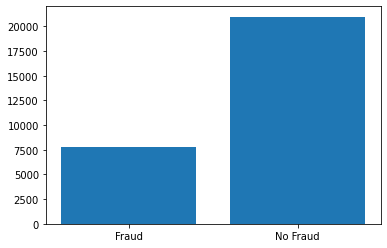

In [ ]:
 # Plotting how many of each label we have
 no, yes = all_data['FraudBool'].value_counts()
 print(no, yes)
 # percent of total that are fraudulent
 print(yes/(yes + no) * 100)
 data = {
     'Fraud': yes,
     'No Fraud': no
 }

 plt.bar(list(data.keys()), list(data.values()))

In [ ]:
all_data.columns

Index(['CustomerID', 'DateOfIncident', 'IncidentTime', 'NumberOfVehicles',
       'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'TypeOfIncident_Parked Car', 'TypeOfIncident_Single Vehicle Collision',
       'TypeOfIncident_Vehicle Theft', 'TypeOfCollission_Missing',
       'TypeOfCollission_Rear Collision', 'TypeOfCollission_Side Collision',
       'AuthoritiesContacted_Fire', 'AuthoritiesContacted_None',
       'AuthoritiesContacted_Other', 'AuthoritiesContacted_Police',
       'SeverityOfIncident_Minor Damage', 'SeverityOfIncident_Total Loss',
       'SeverityOfIncident_Trivial Damage', 'FraudBool'],
      dtype='object')

We wanted to analyze the distribution of claim amounts and compare the fraudulent distributions to the legitimate distributions. To do so, we build a function to display two side-by-side boxplots, one of which was the distribution for fraudulent records and the other the distribution for legitimate records.

In [ ]:
# AmountOfTotalClaim	AmountOfInjuryClaim	AmountOfPropertyClaim	AmountOfVehicleDamage
# AmountOfTotalClaim boxplot
def graph_data(data, col_name, labels):
    bar_data = data[col_name]
    plt.boxplot(bar_data, labels=labels)

In [ ]:
def double_box(data, col_name):
  fraud_data = all_data.loc[all_data['FraudBool'] == True][col_name]
  nofraud_data = all_data.loc[all_data['FraudBool'] == False][col_name]
  test = pd.DataFrame()
  test['Fraud'] = fraud_data
  test.reset_index(drop=True, inplace=True)
  test['No Fraud'] = nofraud_data
  ax = test[['Fraud', 'No Fraud']].plot(kind='box', title=col_name +  'vs. Fraud Detected')

Performing this double box procedure on the AmountOfTotalClaim attribute yielded interesting results. It seems that fraudulent claims are more centered in their distribution, with outlier values found more rarely than in the legitimate claims. Intuitively, this made sense. If we were to file a fraudulent insurance claim, we'd file for an amount high enough to make money but low enough so as to not arouse suspicion.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


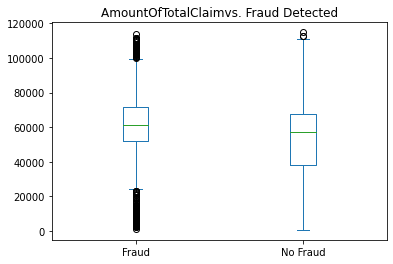

In [ ]:
# Graphing boxplots of Amount of total claim dependent on whether or not fraud was found
double_box(all_data, 'AmountOfTotalClaim')
# Seems like fraud claims are in the middle range; maybe fraudulent transactions are trying to be "reasonable"

The AmountOfInjuryClaim showed similar results, with amounts more well-centered in the fraudulent records.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


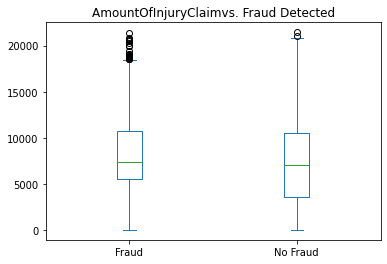

In [ ]:
# Graphing boxplots of Amount of injury claim dependent on whether or not fraud was found
double_box(all_data, 'AmountOfInjuryClaim')
# Once again, fraudulent numbers are more concentrated on "reasonable" values

Once again, in both the AmountOfPropertyClaim and AmountOfVehicleDamage attributes the first quartile of data sat higher on the fraud claim amounts than the no fraud claim amounts. We again suspected that perhaps fraudulent transactions are chosen to be below some minimum amount but not so high as to arouse suspicion.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


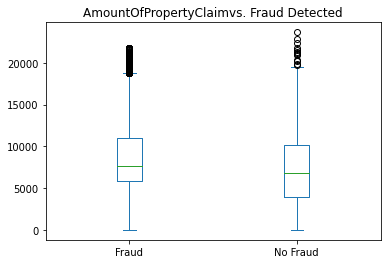

In [ ]:
# Graphing boxplots of Amount of property claim dependent on whether or not fraud was found
double_box(all_data, 'AmountOfPropertyClaim')
# Roughly similar concentration of values

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


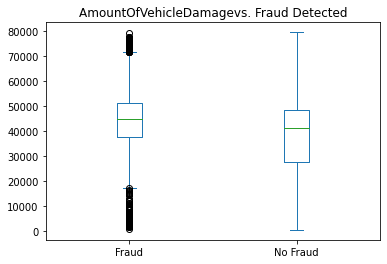

In [ ]:
# Graphing boxplots of Amount of vehicle claim dependent on whether or not fraud was found
double_box(all_data, 'AmountOfVehicleDamage')
# in fraud, more of the data is centered with more rare extreme values on either end

In [ ]:
# First quartile of claims seems to sit higher on Fraud claim amounts than on No Fraud; Maybe fraudulent transactions are chosen to be below some minimum amount but not so high
# as to arouse suspicion

We wanted to examine the correlations between attributes and between the features and the label data to see if we could find any proxies or strong correlations. From analyzing attribute correlations to the label column, we found that vehicle damage, property claim amount, and total claim seem to have a more direct relationship with fraud. Contrastingly, parked car, missing collsion, not contacting the authorities, and all severity categories seemed to have a more inverse relationship with fraud. None of the correlations were high enough, however, to make any strong conclusions.

In [ ]:
all_data.corr().loc['FraudBool']
# Vehicle damage, property claim amount, and total claim seem to have a more direct relationship with fraud
# Parked car, missing collission, not contacting authorities, and all severity categories seem to have a more inverse relationship with fraud

DateOfIncident                            -0.048263
IncidentTime                               0.009144
NumberOfVehicles                           0.041662
BodilyInjuries                             0.026156
Witnesses                                  0.047743
AmountOfTotalClaim                         0.155862
AmountOfInjuryClaim                        0.079548
AmountOfPropertyClaim                      0.134702
AmountOfVehicleDamage                      0.165254
TypeOfIncident_Parked Car                 -0.103209
TypeOfIncident_Single Vehicle Collision    0.075228
TypeOfIncident_Vehicle Theft              -0.098829
TypeOfCollission_Missing                  -0.150291
TypeOfCollission_Rear Collision            0.088394
TypeOfCollission_Side Collision            0.015768
AuthoritiesContacted_Fire                  0.029704
AuthoritiesContacted_None                 -0.123581
AuthoritiesContacted_Other                 0.059113
AuthoritiesContacted_Police               -0.036478
SeverityOfIn

In examining the level of correlation between attributes, we found that the AmountOfTotalClaim attribute was highly correlated with the AmountOfVehicleDamage attribute with a value of .986. As such, we decided that AmountOfTotalClaim was a good proxy for AmountOfVehicleDamage, and that both attributes were not needed. Consequently, we dropped the AmountOfVehicleDamage attribute.

In [ ]:
all_data.corr()
# should drop AmountOfVehicle column since it's very highly correlated with AmountOfTotalClaim (.986)

,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,TypeOfIncident_Parked Car,...,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,FraudBool
DateOfIncident,1.000000,-0.021581,0.039729,-0.025489,0.024796,-0.036242,-0.018614,-0.078884,-0.026817,0.064929,...,-0.056900,0.041544,0.026164,0.011437,0.043960,-0.023013,-0.017109,0.018935,0.005285,-0.048263
IncidentTime,-0.021581,1.000000,0.175016,-0.043814,0.009165,0.273509,0.226766,0.218267,0.272928,-0.201433,...,0.081496,0.143944,0.099377,-0.219053,0.067209,-0.044207,-0.066649,0.144638,-0.201177,0.009144
NumberOfVehicles,0.039729,0.175016,1.000000,0.019361,-0.015994,0.291247,0.254688,0.231714,0.287545,-0.254556,...,0.130570,0.164382,0.076896,-0.265754,0.093035,-0.064070,-0.069000,0.099962,-0.259016,0.041662
BodilyInjuries,-0.025489,-0.043814,0.019361,1.000000,-0.025800,0.031535,0.032308,0.034978,0.027561,-0.032048,...,0.004899,-0.004965,-0.022636,-0.025163,0.003978,0.047287,0.005798,-0.014841,-0.007335,0.026156
Witnesses,0.024796,0.009165,-0.015994,-0.025800,1.000000,-0.009414,-0.024800,0.051849,-0.019661,0.031745,...,-0.033319,-0.033028,-0.001100,0.017079,0.016331,-0.016365,-0.027464,-0.022186,0.014772,0.047743
AmountOfTotalClaim,-0.036242,0.273509,0.291247,0.031535,-0.009414,1.000000,0.831668,0.841911,0.986557,-0.567553,...,0.233664,0.243624,0.209173,-0.592551,0.236375,-0.166209,-0.127870,0.241705,-0.576011,0.155862
AmountOfInjuryClaim,-0.018614,0.226766,0.254688,0.032308,-0.024800,0.831668,1.000000,0.622976,0.763343,-0.451551,...,0.193811,0.188786,0.180078,-0.470813,0.203420,-0.147936,-0.073569,0.190079,-0.461557,0.079548
AmountOfPropertyClaim,-0.078884,0.218267,0.231714,0.034978,0.051849,0.841911,0.622976,1.000000,0.778717,-0.453909,...,0.187047,0.193310,0.138951,-0.475168,0.192568,-0.124347,-0.111078,0.183974,-0.461629,0.134702
AmountOfVehicleDamage,-0.026817,0.272928,0.287545,0.027561,-0.019661,0.986557,0.763343,0.778717,1.000000,-0.570788,...,0.233007,0.246628,0.213901,-0.595774,0.233082,-0.165380,-0.133391,0.245902,-0.578255,0.165254
TypeOfIncident_Parked Car,0.064929,-0.201433,-0.254556,-0.032048,0.031745,-0.567553,-0.451551,-0.453909,-0.570788,1.000000,...,-0.196545,-0.181814,-0.163116,0.505918,-0.148002,0.086101,0.089180,-0.189857,0.436863,-0.103209


In [ ]:
all_data = all_data.drop(['AmountOfVehicleDamage'], axis=1)

We visualized the distribution of the dates the incidents occurred to determine if they were spread out over the year. Surprisingly, we found that all the days were in the first three months of 2015. If we want the model to generalize to days outside of these months, keeping this attribute could hinder that effort. As a result, we dropped the attribute.

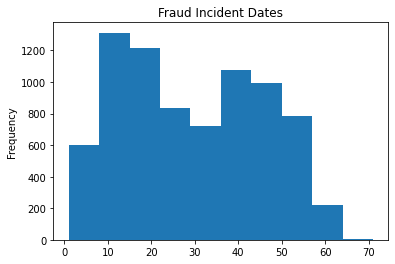

In [ ]:
# dates are concentrated in the first 3 months of 2015
fraud_data = all_data.loc[all_data['FraudBool'] == True]['DateOfIncident']
nofraud_data = all_data.loc[all_data['FraudBool'] == False]['DateOfIncident']
fraud_data.plot(kind='hist', title='Fraud Incident Dates')

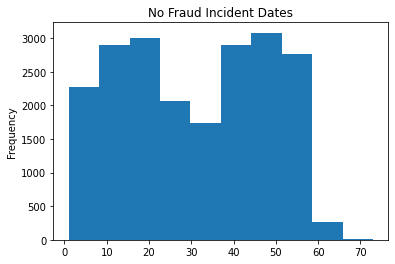

In [ ]:
nofraud_data.plot(kind='hist', title='No Fraud Incident Dates')

In [ ]:
# Drop IncidentDate. If we keep it, the model may not generalize well to outside of the first three months. Moreover, it doesn't quite make sense as a numeric value because claims
# could be filed after the incident or could take place over a range of time.
all_data = all_data.drop(['DateOfIncident'], axis=1)

We dropped customerID because it is an arbitrary value assigned to each record and has no bearing on the fraudulent status of the claim.

In [ ]:
# Drop customerID; don't want to use this column for any training since it has no relation to fraud
all_data = all_data.drop(['CustomerID'], axis=1)
all_data.head(10)

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,...,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,FraudBool
0,17.0,3,1,0.0,65501.0,13417,6071,0,0,0,...,0,1,0,0,0,1,0,1,0,False
1,10.0,3,2,1.0,61382.0,15560,5919,0,0,0,...,0,1,0,0,0,1,0,1,0,False
2,22.0,1,2,3.0,66755.0,11630,11630,0,1,0,...,0,1,0,0,1,0,1,0,0,False
3,22.0,1,2,3.0,66243.0,12003,12003,0,1,0,...,0,1,0,0,1,0,1,0,0,False
4,10.0,1,2,1.0,53544.0,8829,7234,0,1,0,...,1,0,1,0,0,0,1,0,0,False
5,7.0,1,1,2.0,53167.0,7818,8132,0,1,0,...,1,0,1,0,0,0,1,0,0,False
6,20.0,1,0,2.0,77453.0,6476,12822,0,1,0,...,0,0,0,0,0,0,1,0,0,False
7,18.0,1,0,2.0,60569.0,5738,7333,0,1,0,...,0,0,0,0,0,1,1,0,0,False
8,3.0,3,0,0.0,67876.0,6788,7504,0,0,0,...,0,0,0,0,0,0,1,0,0,False
9,5.0,1,1,2.0,71610.0,6510,13020,0,1,0,...,0,1,0,0,0,1,0,0,0,True


Next, we investigated IncidentTime. Unlike the date, this is a value that could be used to make conclusions about the status of the claim, as the time is always within 24 hours, no matter the day or year. Moreover, IncidentTime  could be a good column to use, as intuitively, fraudulent transactions could appear more at night.

In [ ]:
all_data.corr().loc['IncidentTime']

IncidentTime                               1.000000
NumberOfVehicles                           0.175016
BodilyInjuries                            -0.043814
Witnesses                                  0.009165
AmountOfTotalClaim                         0.273509
AmountOfInjuryClaim                        0.226766
AmountOfPropertyClaim                      0.218267
TypeOfIncident_Parked Car                 -0.201433
TypeOfIncident_Single Vehicle Collision    0.055195
TypeOfIncident_Vehicle Theft              -0.213220
TypeOfCollission_Missing                  -0.308981
TypeOfCollission_Rear Collision            0.081496
TypeOfCollission_Side Collision            0.143944
AuthoritiesContacted_Fire                  0.099377
AuthoritiesContacted_None                 -0.219053
AuthoritiesContacted_Other                 0.067209
AuthoritiesContacted_Police               -0.044207
SeverityOfIncident_Minor Damage           -0.066649
SeverityOfIncident_Total Loss              0.144638
SeverityOfIn

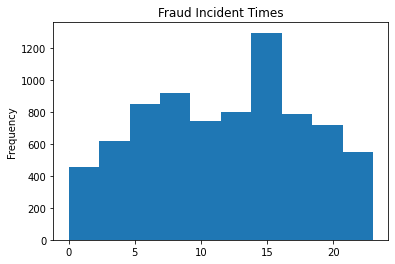

In [ ]:
fraud_data = all_data.loc[all_data['FraudBool'] == True]['IncidentTime']
nofraud_data = all_data.loc[all_data['FraudBool'] == False]['IncidentTime']
fraud_data.plot(kind='hist', title='Fraud Incident Times')

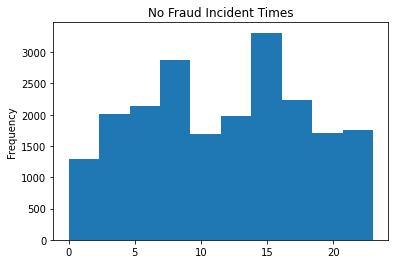

In [ ]:
nofraud_data.plot(kind='hist', title='No Fraud Incident Times')

In [ ]:
# all data has been made into primitives for easy parsing
all_data.dtypes

IncidentTime                               float64
NumberOfVehicles                             int64
BodilyInjuries                               int64
Witnesses                                  float64
AmountOfTotalClaim                         float64
AmountOfInjuryClaim                          int64
AmountOfPropertyClaim                        int64
TypeOfIncident_Parked Car                    uint8
TypeOfIncident_Single Vehicle Collision      uint8
TypeOfIncident_Vehicle Theft                 uint8
TypeOfCollission_Missing                     uint8
TypeOfCollission_Rear Collision              uint8
TypeOfCollission_Side Collision              uint8
AuthoritiesContacted_Fire                    uint8
AuthoritiesContacted_None                    uint8
AuthoritiesContacted_Other                   uint8
AuthoritiesContacted_Police                  uint8
SeverityOfIncident_Minor Damage              uint8
SeverityOfIncident_Total Loss                uint8
SeverityOfIncident_Trivial Dama

**Downsampling Data**

Because we have a major class imbalance, we wanted to manually downsample the training data to include 2000 fraudulent and 2000 legitimate claims. The remaining data would be treated as the final test set.

In [ ]:
# Expected all data length afterwards: 24740
n = 2000
frauds = all_data.loc[all_data['FraudBool'] == True]
no_frauds = all_data.loc[all_data['FraudBool'] == False]
fraud_sample = frauds.sample(n=n)
no_fraud_sample = no_frauds.sample(n=n)
test_data = all_data.drop(fraud_sample.index)
test_data = test_data.drop(no_fraud_sample.index)

train_data = pd.concat([fraud_sample, no_fraud_sample])
print("Train Data Length:: " + str(len(train_data)))
print("Test Data Length:: " + str(len(test_data)))

Train Data Length:: 4000
Test Data Length:: 24740


**Building Models**

We chose to use a variety of models to determine which would be best suited to the classification task. For models where scaling and dimension reduction was important, we used standard scaling and pca dimensionality reduction. The measure of how well the classifier works hinges on whether it can detect a fraudulent claim when it is given one. Therefore, the total accuracy matters less than the recall on the fraudulent claims. As such, we focused on both the accuracy and the recall outputted by each model. Beyond this, the system that we are creating should not be used as a hard classifier of fraud, but rather a flagging system for manual review; in this case, recall becomes more important than accuracy.

In [ ]:
# Set up features and labels for all models
train_features = train_data.drop(['FraudBool'], axis=1)
train_labels = train_data['FraudBool']

test_features = test_data.drop(['FraudBool'], axis=1)
test_labels = test_data['FraudBool']

test_length = len(test_labels)
summary = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall'])

Decision Tree


In [ ]:
# Decision Tree with entropy
tree = DecisionTreeClassifier(criterion='entropy')
options = {
    'max_depth':[5,10,15,20],
    'min_samples_leaf':[5,10,15,20],
    'max_features':[5,10,15]
}
grid_search = sk.model_selection.GridSearchCV(tree, param_grid=options, scoring='accuracy', cv=5)
cross_val = sk.model_selection.cross_val_score(grid_search, train_features, train_labels, cv=10)
print("AVERAGE ACCURACY:: " + str(cross_val.mean()))

AVERAGE ACCURACY:: 0.71425


In [ ]:
# Use the best decision tree to print a confusion matrix and to analyze the results on the test data
fit = grid_search.fit(train_features, train_labels)
dtree_fit = fit.best_estimator_
print(fit.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_leaf=10)


In [ ]:
cross_val_predict = fit.best_estimator_.predict(test_features)
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['Decision Tree', accuracy, recall]

[[14080  4904]
 [ 1633  4123]]
              precision    recall  f1-score   support

       False       0.90      0.74      0.81     18984
        True       0.46      0.72      0.56      5756

    accuracy                           0.74     24740
   macro avg       0.68      0.73      0.68     24740
weighted avg       0.79      0.74      0.75     24740



Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
cross_val = sk.model_selection.cross_val_score(naive_bayes, train_features, train_labels, cv=10)
print("AVERAGE ACCURACY:: " + str(cross_val.mean()))

AVERAGE ACCURACY:: 0.56875


In [ ]:
model = naive_bayes.fit(train_features, train_labels)
nb_fit = model
cross_val_predict = model.predict(test_features)
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['Naive Bayes', accuracy, recall]

[[ 4962 14022]
 [  654  5102]]
              precision    recall  f1-score   support

       False       0.88      0.26      0.40     18984
        True       0.27      0.89      0.41      5756

    accuracy                           0.41     24740
   macro avg       0.58      0.57      0.41     24740
weighted avg       0.74      0.41      0.40     24740



Linear Regression

In [ ]:
scaler = sk.preprocessing.StandardScaler()
pca = sk.decomposition.PCA()
model = LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('model', model)])
cross_val = sk.model_selection.cross_val_score(pipe, train_features, train_labels, cv=5)
print('AVERAGE R^2:: ' + str(cross_val.mean()))

AVERAGE R^2:: 0.048114976108710204


We decided to try Linear Regression to see if it would even work. With an R^2 of ~.05, it definitely does not.

MLP Classifier

In [ ]:
scaler = sk.preprocessing.StandardScaler()
nn = MLPClassifier(hidden_layer_sizes=(200,))
pipe = Pipeline(steps=[('scaler', scaler), ('nn', nn)])
param_grid = {
    'nn__hidden_layer_sizes': [(50,), (100,), (200,)],
    'nn__activation': ['logistic', 'relu', 'tanh']
}
grid = sk.model_selection.GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)
cross_val = sk.model_selection.cross_val_score(grid, train_features, train_labels, cv=5)
print("AVERAGE ACCURACY:: " + str(cross_val.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

AVERAGE ACCURACY:: 0.747


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Use the best decision tree to print a confusion matrix and to analyze the results on the test data
fit = grid.fit(train_features, train_labels)
mlp_fit = fit.best_estimator_
print(fit.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Pipeline(steps=[('scaler', StandardScaler()),
                ('nn',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(200,)))])


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
cross_val_predict = fit.best_estimator_.predict(test_features)
# good at classifying false ones, but not great precision or recall on true
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['MLP', accuracy, recall]

[[14800  4184]
 [ 1431  4325]]
              precision    recall  f1-score   support

       False       0.91      0.78      0.84     18984
        True       0.51      0.75      0.61      5756

    accuracy                           0.77     24740
   macro avg       0.71      0.77      0.72     24740
weighted avg       0.82      0.77      0.79     24740



Ensemble: Ada Boost

In [ ]:
model = AdaBoostClassifier()
param_grid = {
  'n_estimators': list(range(20, 61, 20)),
  'learning_rate': [0.5, 1, 1.5]
}
grid = sk.model_selection.GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
cross_val = sk.model_selection.cross_val_score(grid, train_features, train_labels, cv=5)
print("AVERAGE ACCURACY:: " + str(cross_val.mean()))

AVERAGE ACCURACY:: 0.7185


In [ ]:
# Use the best decision tree to print a confusion matrix and to analyze the results
# best number of estimators appears to be 40 with lr=1
fit = grid.fit(train_features, train_labels)
ada_fit = fit.best_estimator_
print(fit.best_estimator_)

AdaBoostClassifier(learning_rate=1, n_estimators=40)


In [ ]:
cross_val_predict = fit.best_estimator_.predict(test_features)
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['Ada Boost', accuracy, recall]

[[15428  3556]
 [ 2079  3677]]
              precision    recall  f1-score   support

       False       0.88      0.81      0.85     18984
        True       0.51      0.64      0.57      5756

    accuracy                           0.77     24740
   macro avg       0.69      0.73      0.71     24740
weighted avg       0.79      0.77      0.78     24740



SVM

In [ ]:
scaler = sk.preprocessing.StandardScaler()
# auto-select components based on 95% of the variance
pca = sk.decomposition.PCA(n_components=.95, svd_solver='full')
model = SVC()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('model', model)])
param_grid = {
    'model__kernel': ['linear', 'rbf', 'poly']
}
grid = sk.model_selection.GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)
cross_val = sk.model_selection.cross_val_score(grid, train_features, train_labels, cv=5)
print("AVERAGE ACCURACY:: " + str(cross_val.mean()))

AVERAGE ACCURACY:: 0.73125


In [ ]:
# Use the best decision tree to print a confusion matrix and to analyze the results
fit = grid.fit(train_features, train_labels)
svm_fit = fit.best_estimator_
print(fit.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, svd_solver='full')),
                ('model', SVC())])


In [ ]:
cross_val_predict = fit.best_estimator_.predict(test_features)
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['SVC', accuracy, recall]

[[15658  3326]
 [ 2035  3721]]
              precision    recall  f1-score   support

       False       0.88      0.82      0.85     18984
        True       0.53      0.65      0.58      5756

    accuracy                           0.78     24740
   macro avg       0.71      0.74      0.72     24740
weighted avg       0.80      0.78      0.79     24740



K-nearest Neighbors

In [ ]:
scaler = sk.preprocessing.StandardScaler()
# auto-select components based on 95% of the variance
pca = sk.decomposition.PCA(n_components=.95, svd_solver='full')
model = KNeighborsClassifier(n_neighbors=4)
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('model', model)])
param_grid = {
    'model__n_neighbors': list(range(1,11))
}
grid = sk.model_selection.GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)
cross_val = sk.model_selection.cross_val_score(grid, train_features, train_labels, cv=5)
print("AVERAGE ACCURACY:: " + str(cross_val.mean()))

AVERAGE ACCURACY:: 0.7415


In [ ]:
# Use the best decision tree to print a confusion matrix and to analyze the results
fit = grid.fit(train_features, train_labels)
knn_fit = fit.best_estimator_
print(fit.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, svd_solver='full')),
                ('model', KNeighborsClassifier(n_neighbors=8))])


In [ ]:
cross_val_predict = fit.best_estimator_.predict(test_features)
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['KNN', accuracy, recall]

[[14886  4098]
 [ 1656  4100]]
              precision    recall  f1-score   support

       False       0.90      0.78      0.84     18984
        True       0.50      0.71      0.59      5756

    accuracy                           0.77     24740
   macro avg       0.70      0.75      0.71     24740
weighted avg       0.81      0.77      0.78     24740



Voting Classifier: Ensemble all the best trained classifiers together

In [ ]:
# knn_fit, svm_fit, ada_fit, mlp_fit, nb_fit, dtree_fit
ensemble = VotingClassifier(estimators=[('knn', knn_fit), ('mlp', mlp_fit), ('dtree', dtree_fit), ('nb', nb_fit)], voting='soft', weights=[2,2,1,.5])
fit = ensemble.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
cross_val_predict = fit.predict(test_features)
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['Ensemble Best', accuracy, recall]

[[14730  4254]
 [ 1363  4393]]
              precision    recall  f1-score   support

       False       0.92      0.78      0.84     18984
        True       0.51      0.76      0.61      5756

    accuracy                           0.77     24740
   macro avg       0.71      0.77      0.72     24740
weighted avg       0.82      0.77      0.79     24740



In [ ]:
# Trying all classifiers intead of just the best four
ensemble = VotingClassifier(estimators=[('knn', knn_fit), ('mlp', mlp_fit), ('dtree', dtree_fit), ('ada', ada_fit), ('svm', svm_fit), ('nb', nb_fit)], voting='hard')
fit = ensemble.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
cross_val_predict = fit.predict(test_features)
conf_matrix = sk.metrics.confusion_matrix(test_labels, cross_val_predict)
print(conf_matrix)
report = sk.metrics.classification_report(test_labels, cross_val_predict)
print(report)
accuracy = sk.metrics.accuracy_score(test_labels, cross_val_predict)
recall = sk.metrics.recall_score(test_labels, cross_val_predict)
summary.loc[len(summary.index)] = ['Ensemble All', accuracy, recall]

[[15716  3268]
 [ 1751  4005]]
              precision    recall  f1-score   support

       False       0.90      0.83      0.86     18984
        True       0.55      0.70      0.61      5756

    accuracy                           0.80     24740
   macro avg       0.73      0.76      0.74     24740
weighted avg       0.82      0.80      0.80     24740



**Model Analysis**

The core estimator we used for the efficacy of the model was a combination of the recall on the True values and overall accuracy. The models that scored the highest were MLP, K-nearest, and decision tree. The greatest combination of accuracy and precision were from the MLP, with 77% and 75% respectively, though the other top classifiers were not too far off on either of these numbers. What was very interesting was the Naive Bayes' model's very high recall and very low accuracy. Though the accuracy was low, perhaps the Naive Bayes is the best model to use as a flagging system, as these systems are more concerned with flagging fraudulent claims than they are with classifying non-fraudulent claims. In terms of choosing one model to use, we thought that using an ensemble of the MLP, KNN, decision tree, and the Naive Bayes would be a good classifier for the purposes of creating a fraudulent flagging system. As such, we created this model (see Ensemble Best below). Surprisingly, we found that this model only created negligibile accuracy and recall benefits over the trained MLP model. There may be higher correlations between the models than we initially expected. To combat this issue, we tried ensembling all of our best fit models together (see Ensemble All below), but this seemed to only increase accuracy, with recall taking an ~8% cut as compared to the Ensemble Best. Overall, we would recommend using the Ensemble Best or the MLP classifiers for use as the detection system.

While we would have liked to do more grid search variations on our models, doing so increased the runtime to an infeasible level. For future steps, we were considering SMOTE to combat the class imbalance problem and perhaps improve our precision. Our current approach uses manual downsampling of the training set to 2000 fraudulent and 2000 non fraudulent records. Though this greatly improved accuracy and recall over using the entire set, it also introduces sampling error. Depending on the sample of records chosen, the accuracy and recall may change. When running the models multiple times on different samples, this didn't seem to change the metrics by a significant amount; this, however, is still a possibility. We considered using cross-val over the entire process to solve this, but we realized that this would increase our runtime to several hours or even longer. Other future steps include using all the data provided, not just the claims data subset we decided to use. This would involve much more feature engineering, as the number of features would reach into the 100s.

In [ ]:
summary

,Model,Accuracy,Recall
0,Decision Tree,0.735772,0.716296
1,Naive Bayes,0.406791,0.886379
2,MLP,0.773040,0.751390
3,Ada Boost,0.772231,0.638812
4,SVC,0.783306,0.646456
5,KNN,0.767421,0.712300
6,Ensemble Best,0.777688,0.764072
7,Ensemble All,0.797130,0.695796
